In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

from luwiji.cluster import  demo

# Simple Data


In [2]:
x1, y1 = demo.blob_data()
x2, y2 = demo.moon_data()
x3, y3 = demo.circle_data()

# Visualization

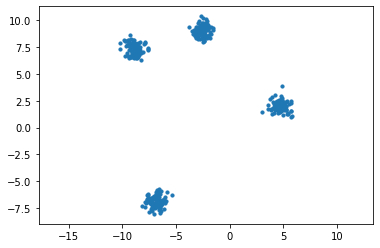

In [17]:
x = x1
plt.scatter(x[:,0], x[:,1], s=10)
plt.axis("equal");

# K-Means Clustering

In [25]:
kmean = KMeans(n_clusters=4)
member =kmean.fit_predict(x)
center =kmean.cluster_centers_

# Visualization clustering

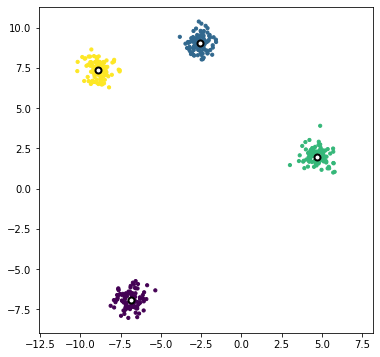

In [26]:
kmean = KMeans(n_clusters=4)
member =kmean.fit_predict(x)
center =kmean.cluster_centers_
plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.scatter(center[:,0],center[:,1],c ="w", edgecolors="k",linewidths=2)
plt.axis("equal");

# Clusteriing data moon

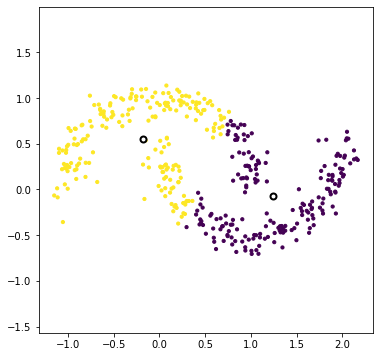

In [28]:
x = x2
kmean = KMeans(n_clusters=2)
member =kmean.fit_predict(x)
center =kmean.cluster_centers_
plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.scatter(center[:,0],center[:,1],c ="w", edgecolors="k",linewidths=2)
plt.axis("equal");

# contoh donat dataset

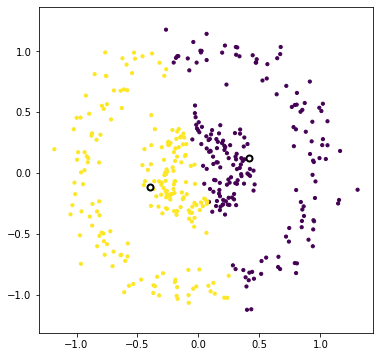

In [29]:
x = x3
kmean = KMeans(n_clusters=2)
member =kmean.fit_predict(x)
center =kmean.cluster_centers_
plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.scatter(center[:,0],center[:,1],c ="w", edgecolors="k",linewidths=2)
plt.axis("equal");

# Menentukan K(n_cluster) tanpa label -> inertia / Elbow analysis

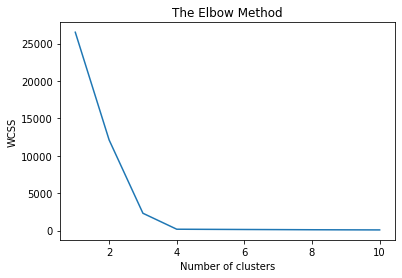

In [33]:
x = x1
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Menentukan K(n_cluster) dan ada label ->silhouette score

In [34]:
from sklearn.metrics import silhouette_score

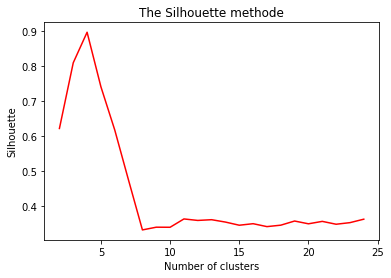

In [37]:
x = x1
score = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters = i)
    member = kmeans.fit_predict(x)
    
    siluet = silhouette_score(x, member, metric='euclidean')
    score.append(siluet)
    
plt.plot(range(2, 25), score,"r-")
plt.title('The Silhouette methode')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette');
plt.show()

# Spectral Clustering

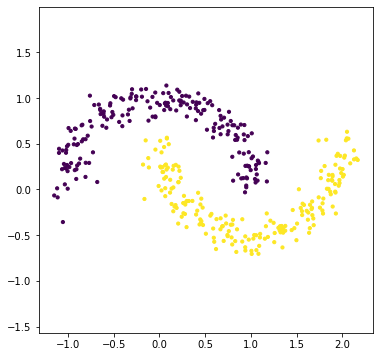

In [43]:
x = x2
sc = SpectralClustering(n_clusters=2, gamma=100)
member =sc.fit_predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.axis("equal");

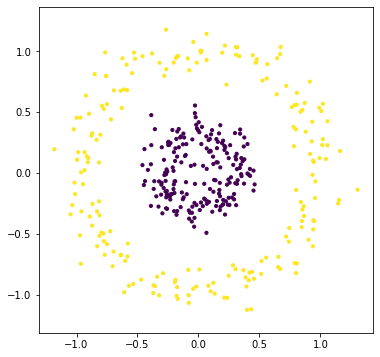

In [44]:
x = x3
sc = SpectralClustering(n_clusters=2, gamma=100)
member =sc.fit_predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.axis("equal");

# DBSCAN

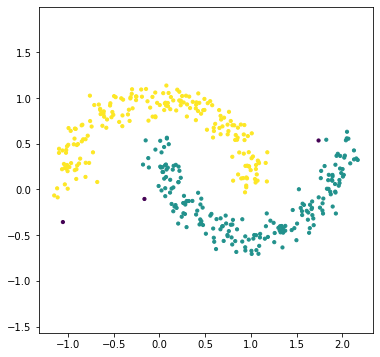

In [48]:
x = x2
dbs = DBSCAN(eps=0.2)
member =dbs.fit_predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.axis("equal");

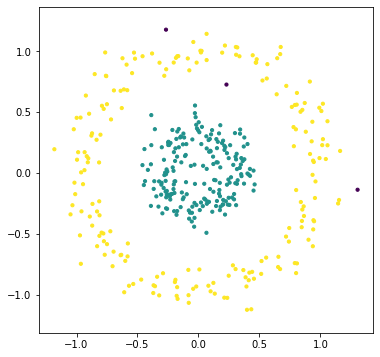

In [47]:
x = x3
dbs = DBSCAN(eps=0.2)
member =dbs.fit_predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.axis("equal");

# AHC 

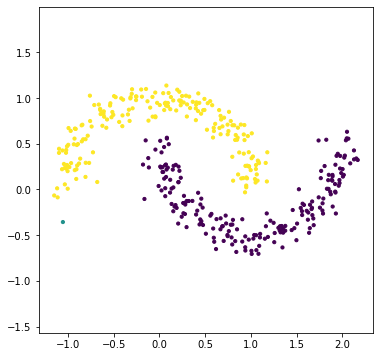

In [53]:
x = x2
ahc = AgglomerativeClustering(n_clusters=3,linkage="single")
member =ahc.fit_predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.axis("equal");

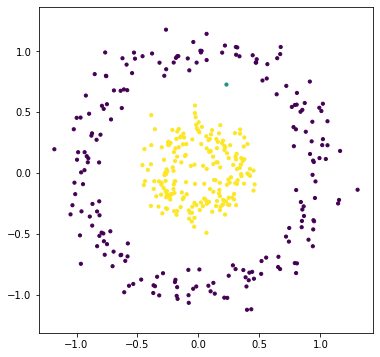

In [54]:
x = x3
ahc = AgglomerativeClustering(n_clusters=3,linkage="single")
member =ahc.fit_predict(x)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c =member, s=10)
plt.axis("equal");

# Scipy

In [55]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [56]:
x, y = demo.blob_data(30)

In [57]:
z = linkage(x)

# Get membership

In [58]:
labels = fcluster(z, 4, criterion="maxclust")
labels

array([4, 1, 2, 2, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 3, 3, 3,
       3, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

In [61]:
labels = fcluster(z, 7, criterion="distance")
labels

array([3, 1, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

# Visuzlize Dendogram

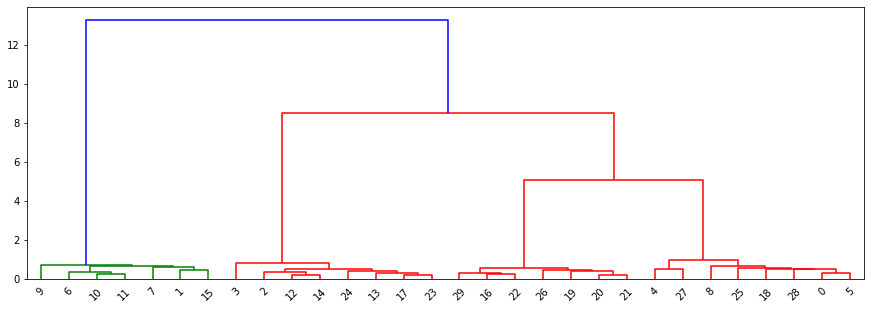

In [62]:
plt.figure(figsize=(15,5))
dendrogram(z);